In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing

In [3]:
data = datasets.load_breast_cancer()

In [4]:
x = data.data

In [5]:
y = data.target

### Odredjivanje vrednosti hiperparametra na validacionom skupu

In [7]:
x_train_validation, x_test, y_train_validation, y_test =\
    model_selection.train_test_split(x, y, train_size = 0.67, test_size=0.33, stratify = y, random_state = 7)

In [8]:
x_train, x_validation, y_train, y_validation =\
    model_selection.train_test_split(x_train_validation, y_train_validation, train_size = 0.8, test_size = 0.2, stratify = y_train_validation, random_state = 7)

In [108]:
scaler_tv = preprocessing.StandardScaler()
scaler_tv.fit(x_train)
x_train = scaler_tv.transform(x_train)
x_validation = scaler_tv.transform(x_validation)

In [109]:
scaler_tt = preprocessing.StandardScaler()
scaler_tt.fit(x_train_validation)
x_train_validation = scaler_tt.transform(x_train_validation)
x_test = scaler_tt.transform(x_test)

Vrsimo vizuelizaciju velicine skupova.

Text(0.5,1,'Procenat')

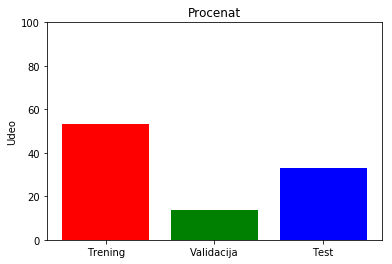

In [15]:
fig, ax = plt.subplots()

n = x.shape[0]
n_trening = x_train.shape[0] / n * 100
n_val = x_validation.shape[0] / n * 100
n_test = x_test.shape[0] / n * 100

bar_trening, bar_val, bar_test = plt.bar([0, 1, 2], (n_trening, n_val, n_test))

bar_trening.set_facecolor('r')
bar_val.set_facecolor('g')
bar_test.set_facecolor('b')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Trening', 'Validacija', 'Test'])

ax.set_ylim([0, 100])
ax.set_ylabel('Udeo')

ax.set_title('Procenat')

In [110]:
Cs = np.array([10**i for i in range(-5, 5)])
gammas = np.array([10**i for i in range(-3, 3)])
best_score = 0 
best_params = {'C':0, 'gamma': 0}

In [111]:
for C in Cs: 
    for gamma in gammas:
        model = svm.SVC(C = C, gamma = gamma)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_validation)
        score = metrics.accuracy_score(y_validation, y_predicted)
        if score>best_score: 
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

In [112]:
best_score

0.98701298701298701

In [113]:
best_params

{'C': 10.0, 'gamma': 0.01}

In [114]:
model = svm.SVC(C=best_params['C'], gamma=best_params['gamma'])

Obucavamo model, ali obratite paznju da ga obucavamo na **uniji** originalnih skupova za obucavanje i validaciju.

In [115]:
model.fit(x_train_validation, y_train_validation)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
y_predicted = model.predict(x_test)

In [117]:
metrics.accuracy_score(y_test, y_predicted)

0.96808510638297873

### Evaluacija modela koriscenjem unakrsne validacije

In [118]:
model = svm.SVC(C = best_params['C'], gamma=best_params['gamma'])

In [119]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [120]:
scores = model_selection.cross_val_score(model, x, y, scoring='accuracy', cv = 10)

In [121]:
scores

array([ 1.        ,  0.98275862,  0.96491228,  0.98245614,  0.98245614,
        0.98245614,  0.92982456,  1.        ,  1.        ,  0.96428571])

In [122]:
scores.mean()

0.97891495981332621

### Odredjivanje vrednosti hiperparametra unakrsnom validacijom

In [123]:
Cs = np.array([10**i for i in range(-5, 5)])
gammas = np.array([10**i for i in range(-3, 3)])
best_score = 0 
best_params = {'C':0, 'gamma': 0}

In [124]:
for C in Cs: 
    for gamma in gammas:
        model = svm.SVC(C = C, gamma = gamma)
        scores = model_selection.cross_val_score(model, x_train_validation, y_train_validation, scoring='accuracy', cv=10)
        score = scores.mean()
        if score>best_score: 
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

In [125]:
best_score

0.97637961848488164

In [126]:
best_params

{'C': 10.0, 'gamma': 0.01}

In [127]:
model = svm.SVC(C = best_params['C'], gamma=best_params['gamma'])
model.fit(x_train_validation, y_train_validation)
y_predicted = model.predict(x_test)
metrics.accuracy_score(y_test, y_predicted)

0.96808510638297873

Ugradjena sklearn podrska koristi unakrsnu validaciju za odredjivanje vrednosti hiperparametara (CV na kraju naziva metode oznacava cross-validation).

In [140]:
grid_model = svm.SVC()
params = {'C': [10**i for i in range(-5, 5)], 'gamma': [10**i for i in range(-3, 3)]}
grid = model_selection.GridSearchCV(grid_model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [141]:
grid.fit(x_train_validation, y_train_validation)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [142]:
grid.best_score_

0.97900262467191601

In [143]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

Informacije o svakom koraku unakrsne validacije za svaku kombinaciju vrednosti metaparametara su dostupne kroz izvestaj.

In [152]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004799,0.001286,0.627297,0.627298,1e-05,0.001,"{'C': 1e-05, 'gamma': 0.001}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000511,0.000260,0.003689,0.000924
1,0.004044,0.001002,0.627297,0.627298,1e-05,0.01,"{'C': 1e-05, 'gamma': 0.01}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000317,0.000096,0.003689,0.000924
2,0.004317,0.000971,0.627297,0.627298,1e-05,0.1,"{'C': 1e-05, 'gamma': 0.1}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.001082,0.000069,0.003689,0.000924
3,0.005526,0.001238,0.627297,0.627298,1e-05,1,"{'C': 1e-05, 'gamma': 1}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.001322,0.000414,0.003689,0.000924
4,0.004837,0.001355,0.627297,0.627298,1e-05,10,"{'C': 1e-05, 'gamma': 10}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000816,0.000246,0.003689,0.000924
5,0.002954,0.000823,0.627297,0.627298,1e-05,100,"{'C': 1e-05, 'gamma': 100}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000144,0.000071,0.003689,0.000924
6,0.004722,0.001203,0.627297,0.627298,0.0001,0.001,"{'C': 0.0001, 'gamma': 0.001}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.001392,0.000456,0.003689,0.000924
7,0.004434,0.001151,0.627297,0.627298,0.0001,0.01,"{'C': 0.0001, 'gamma': 0.01}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000986,0.000224,0.003689,0.000924
8,0.004042,0.001028,0.627297,0.627298,0.0001,0.1,"{'C': 0.0001, 'gamma': 0.1}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000055,0.000135,0.003689,0.000924
9,0.004317,0.000972,0.627297,0.627298,0.0001,1,"{'C': 0.0001, 'gamma': 1}",23,0.623377,0.628289,...,0.631579,0.626230,0.631579,0.626230,0.626667,0.627451,0.000097,0.000049,0.003689,0.000924


In [146]:
cv_test_score = cv_results['mean_test_score'].values.reshape(6, 10)

Informacije iz izvestaja se mogu koristiti i za uvid u opsege vrednosti iz kojih su hiperparametri birani. To se obicno radi vizuelizacijom u vidu toplotne mape. Ukoliko su opsezi vrednosti dobro birani, optimalne vrednosti su skoncentrisane po sredini.

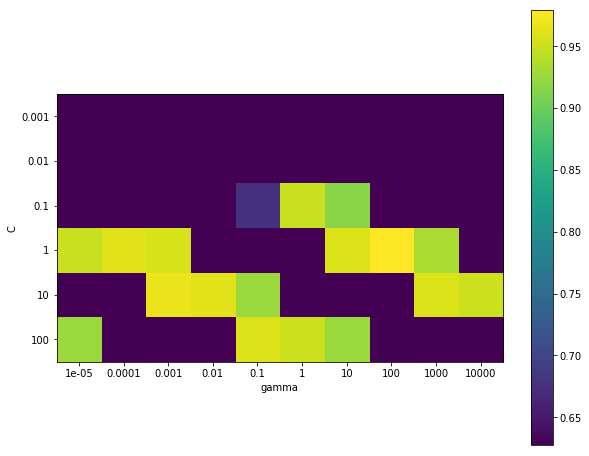

In [153]:
plt.figure(figsize=(10, 8))
plt.xlabel('gamma')
plt.ylabel('C')
plt.yticks(np.arange(0, 7), [10**i for i in range(-3, 3)])
plt.xticks(np.arange(0, 11), [10**i for i in range(-5, 5)])
plt.imshow(cv_test_score, cmap='viridis', )
plt.colorbar()

In [150]:
scores = model_selection.cross_val_score(model_selection.GridSearchCV(grid_model, param_grid= params, scoring='accuracy', cv=5), x, y, scoring='accuracy', cv=10)

In [151]:
print("Min accuracy: %f, max accuracy %f, mean accuracy: %f" % (np.min(scores), np.max(scores), np.mean(scores)))

Min accuracy: 0.892857, max accuracy 0.948276, mean accuracy: 0.924242
